# <center><font color='#333333'>Chinese Word Cloud</font></center>

### <center><font color='#3b5998'>Created by cyda - Yeung Wong & Carrie Lo</font></center>


---

![logo](https://4.bp.blogspot.com/-LAXjdvVCYCU/WxeQFKQ-1wI/AAAAAAAAACs/o8IJ1eLLAEwQYv2Az7EqQi9jODTqRx7wACK4BGAYYCw/s1000/tight%2Bbanner_with_description.png)


---
Please acknowledge <b>team cyda - Yeung Wong & Carrie Lo</b> when using the code

<b><font color='#3b5998'>If you find this script is helpful, please feel free to endorse us through Linkedin!</font></b>

<b>Linkedin:</b>

Yeung Wong - https://www.linkedin.com/in/yeungwong/

Carrie Lo - https://www.linkedin.com/in/carrielsc/
---


# Step 1 - Data Source (Text)


## 1.1 text data source


In [219]:
# name the word cloud data source as variable text
# text = open('text.txt', 'r',encoding= 'UTF-8-sig').read()
text = open('my.txt', 'r', encoding='UTF-8-sig').read()
# text[0:500]


## 1.2 text preprocessing - tokenization


In [220]:
import jieba
# text = ' '.join(jieba.cut(text))
# text[0:500]
text


'综合管理部  吴仁树 招蛇网络  蛇口电视台  钟达强南油平方  杨艺冬 程新 胡超    蛇口消息报  刘文荣 吴小莉   园区发展中心  申林  产业发展中心  赵海琪  产园研究院  杨尚阳  产园投资中心  周凡意  产园-深圳公司  师情 杨波  产园-武汉公司  郜正姣  产园-南京公司  丁敬  产园-杭州公司  余慧俊  产园-重庆公司  金丽萍  产园-青岛公司  赵希龙  文化产业公司  林巧  番禺科技园  陈伊娥  南油平方  杨艺冬 程新 胡超  招蛇网络&蛇口电视台  钟达强综合管理部  吴仁树 招蛇网络  蛇口电视台  钟达强南油平方  杨艺冬 程新 胡超    蛇口消息报  刘文荣 吴小莉 李海强 王雯珺 邹玲 刘开欢  园区发展中心  申林  产业发展中心  赵海琪  产园研究院  杨尚阳  产园投资中心  周凡意  产园-深圳公司  师情 杨波  产园-武汉公司  郜正姣  产园-南京公司  丁敬  产园-杭州公司  余慧俊  产园-重庆公司  金丽萍  产园-青岛公司  赵希龙  文化产业公司  林巧  番禺科技园  陈伊娥  南油平方  杨艺冬 程新 胡超  招蛇网络&蛇口电视台  钟达强综合管理部  吴仁树 招蛇网络  蛇口电视台  钟达强南油平方  杨艺冬 程新 胡超    蛇口消息报  刘文荣 吴小莉 李海强 王雯珺 邹玲 刘开欢  园区发展中心  申林  产业发展中心  赵海琪  产园研究院  杨尚阳  产园投资中心  周凡意  产园-深圳公司  师情 杨波  产园-武汉公司  郜正姣  产园-南京公司  丁敬  产园-杭州公司  余慧俊  产园-重庆公司  金丽萍  产园-青岛公司  赵希龙  文化产业公司  林巧  番禺科技园  陈伊娥  南油平方  杨艺冬 程新 胡超  招蛇网络&蛇口电视台  钟达强综合管理部  吴仁树 招蛇网络  蛇口电视台  钟达强南油平方  杨艺冬 程新 胡超    蛇口消息报  刘文荣 吴小莉 李海强 王雯珺 邹玲 刘开欢  园区发展中心  申林  产业发展中心  赵海琪  产园研究院  杨尚阳  产园投资中心  周凡意  产园-深圳公司  师情 杨波  产园-武汉公司  郜正姣  产园-南京公司  丁敬  产园-杭州公司  余慧俊  产园-重庆公司  金丽萍  产园-青岛公司  赵希

# Step 2 - Word Cloud Design


## 2.1 Shape


In [221]:
from PIL import Image
import numpy as np
icon_path = 'icon.png'
icon = Image.open(icon_path)
mask = Image.new("RGB", icon.size, (255, 255, 255))
mask.paste(icon, icon)
mask = np.array(mask)


## 2.2 Color (Choose 1 out of 3)


### 2.2.1 plain color


In [222]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple([255, 255, 255])  # RGB code of white color


### 2.2.2 color based on the image


In [223]:
from wordcloud import ImageColorGenerator
color_func = ImageColorGenerator(mask)


### 2.2.3 palettable color set


https://jiffyclub.github.io/palettable/colorbrewer/


In [224]:
import random
# choose the color set you like
from palettable.colorbrewer.sequential import RdPu_9


def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # we got 9 colors, so we generate random number from 0 to 8
    return tuple(RdPu_9.colors[random.randint(4, 8)])


## 2.3 Font


In [225]:
# indicate the font path that can display Chinese
# font_path = 'SNsanafonGyou.ttf'
font_path = './NotoSerifSC-Bold.otf'


# Step 3 - Generate the Word Cloud


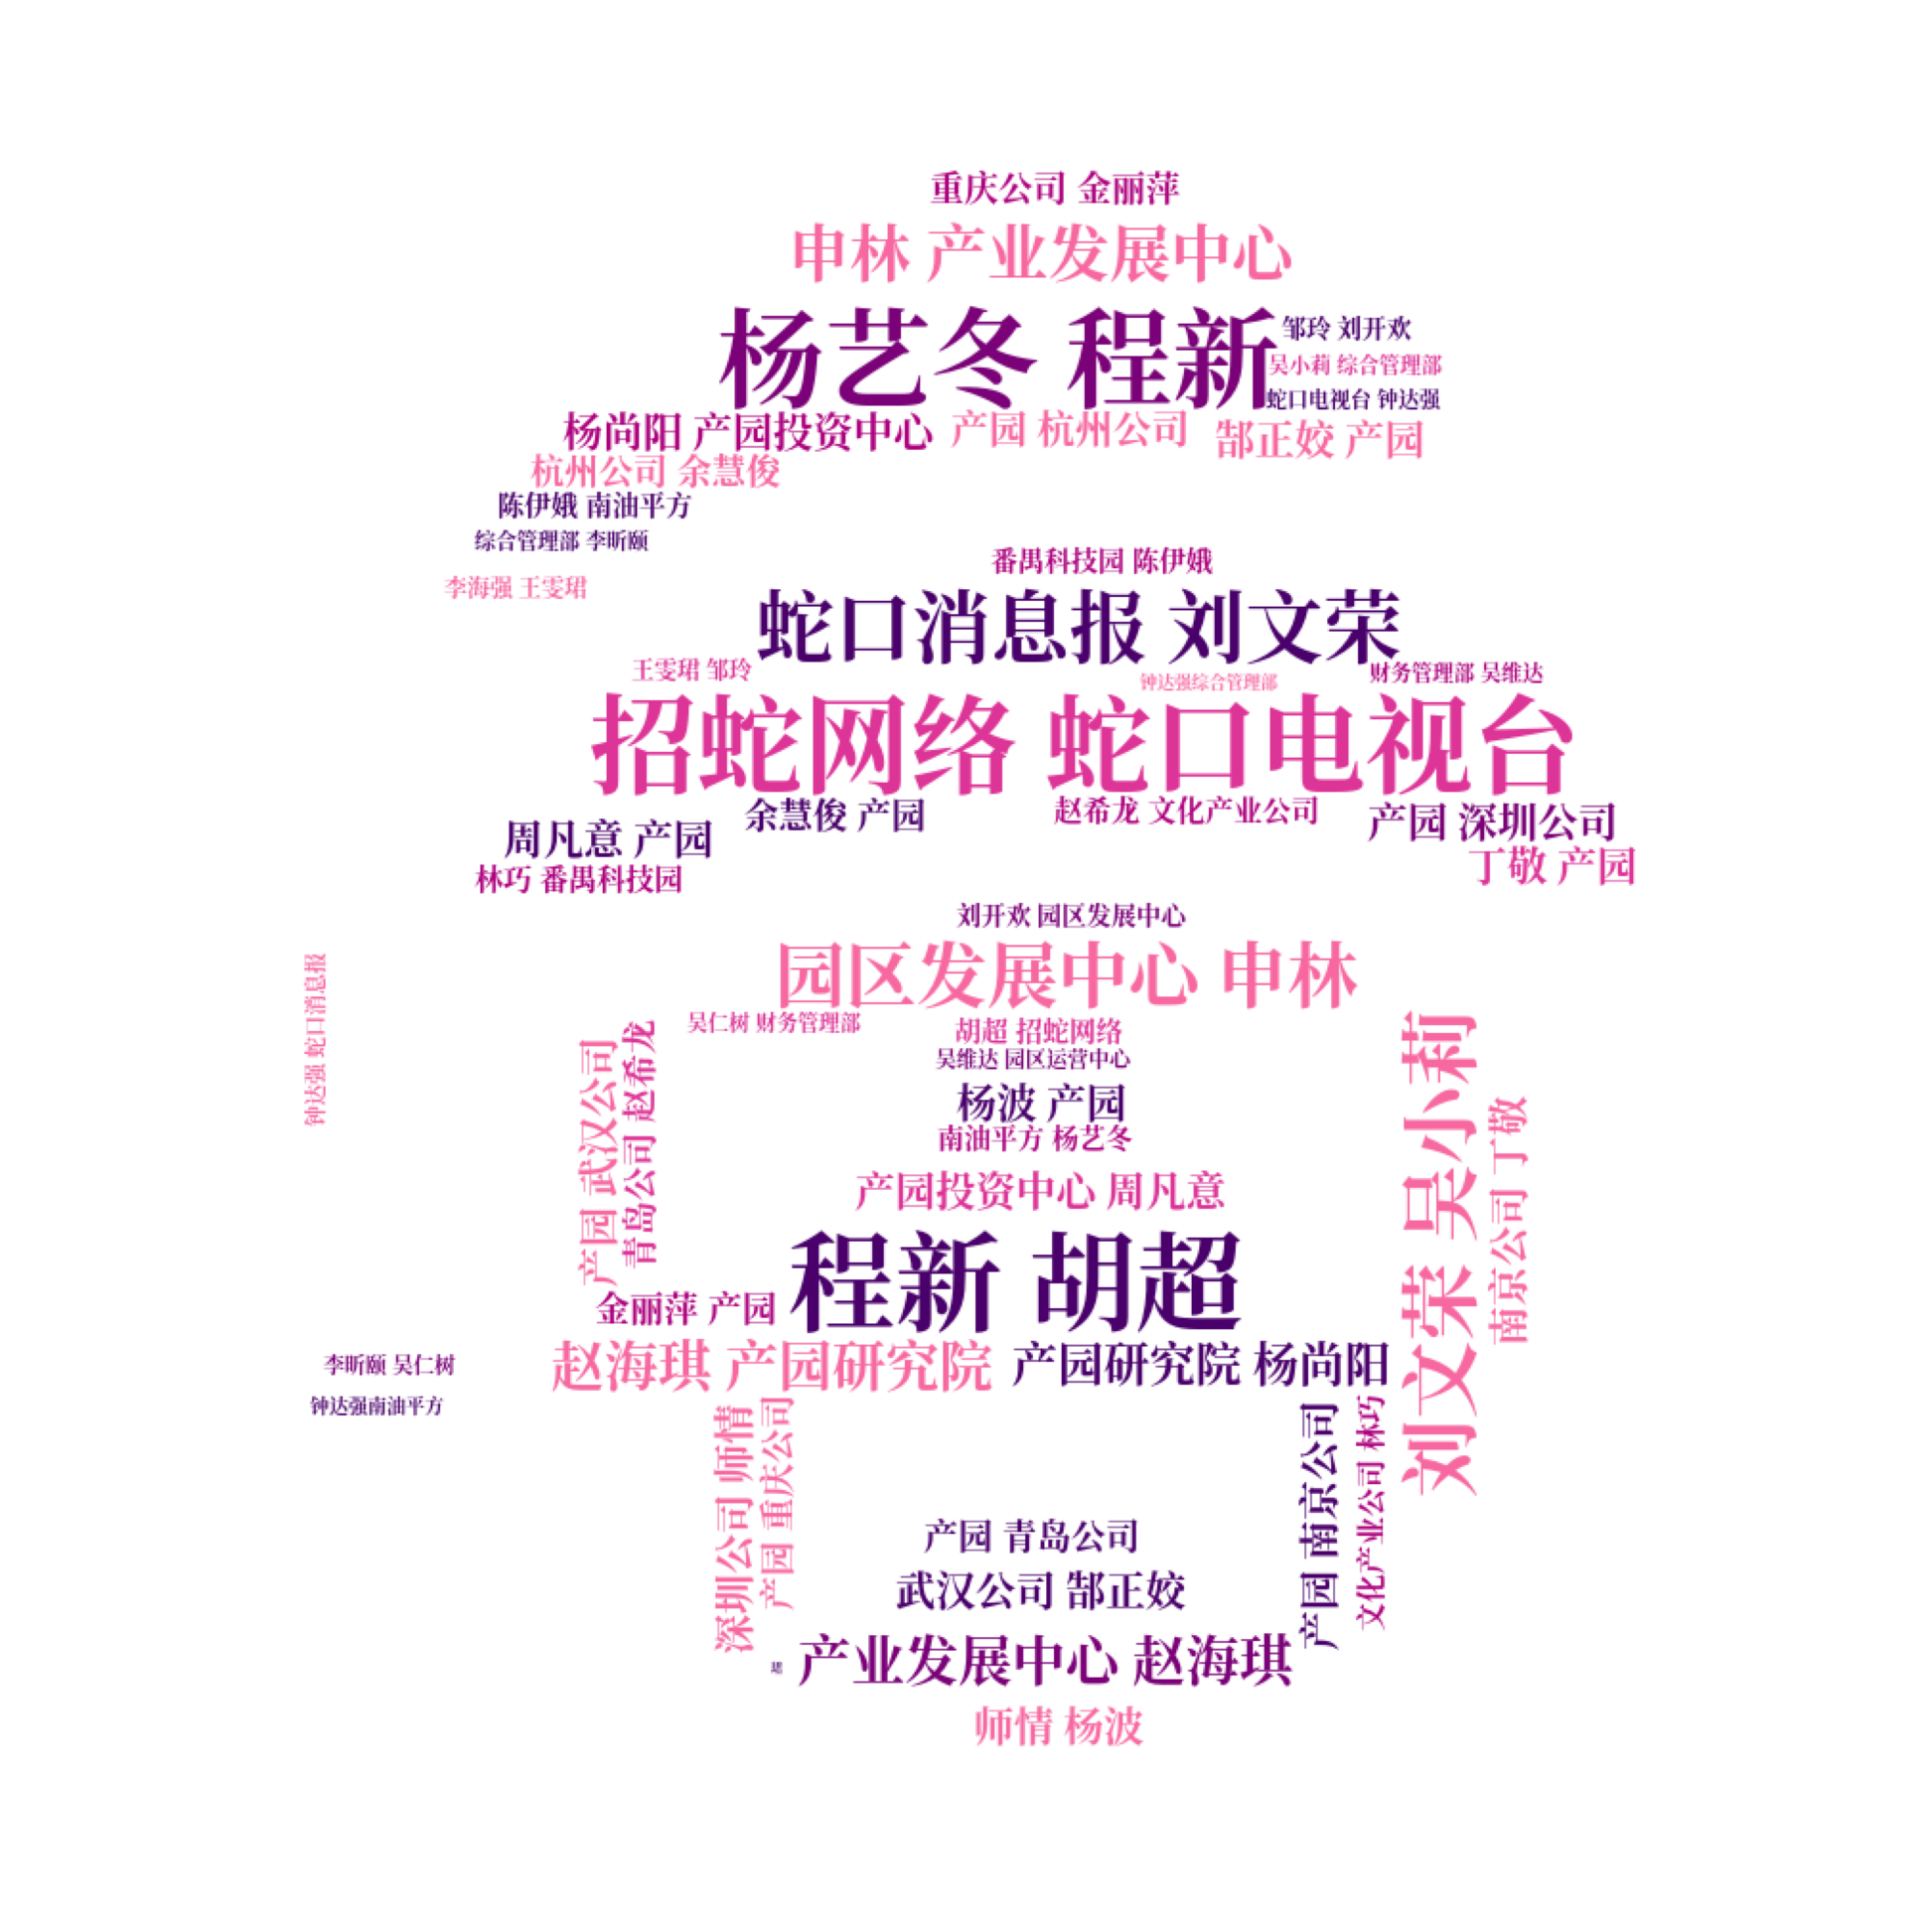

In [226]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(font_path=font_path, background_color="white",
               max_words=2000, mask=mask, max_font_size=300, random_state=1)
wc.generate_from_text(text)
wc.recolor(color_func=color_func, random_state=2)

# save as png
output_path = 'wordcloud.png'
wc.to_file(output_path)

# display the word cloud
plt.rcParams["figure.figsize"] = (25, 25)
plt.imshow(wc)
plt.axis("off")
plt.show()


---

# <center><font color='#FF0000'>~ This</font> <font color='#FF7F00'>is</font> <font color='#FFFF00'>the</font> <font color='#00FF00'>end</font> <font color='#00FFFF'>of</font> <font color='#0000FF'>the</font> <font color='#8B00FF'>script ~</font></center>


---

<b><font color='#3b5998'>If you appreciate our hard work, please endorse us through linkedin!</font></b>

<b>Linkedin:</b>

Yeung Wong - https://www.linkedin.com/in/yeungwong/

Carrie Lo - https://www.linkedin.com/in/carrielsc/
